In [34]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Data preprocessing

In [35]:
data = pd.read_csv("../data/indian_liver_patient.csv")

In [36]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3        

In [37]:
print(f"\nShape of the dataset (rows, columns): {data.shape}")


Shape of the dataset (rows, columns): (583, 11)


In [38]:
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values per column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [39]:
print("\nPercentage of missing values per column:")
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


Percentage of missing values per column:
Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.686106
Dataset                       0.000000
dtype: float64


In [40]:
print("\nConcise summary of the DataFrame (df.info()):")
data.info()


Concise summary of the DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [41]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [42]:
# names of all columns
print("\nColumn names:")
print(data.columns.tolist())


Column names:
['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


C:\Users\HP\AppData\Local\Temp\ipykernel_3188\1069780326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


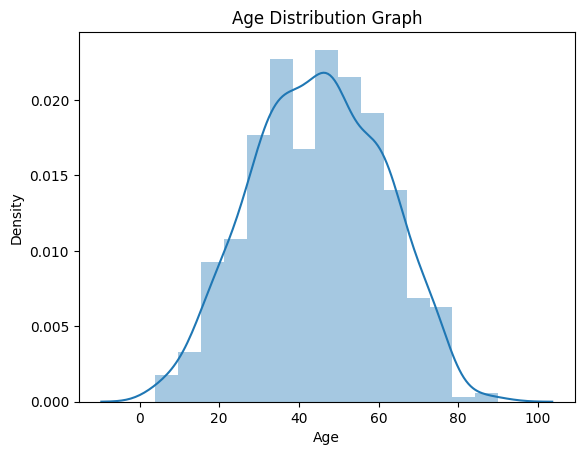

In [43]:
sns.distplot(data['Age'])
plt.title("Age Distribution Graph")
plt.show()

In [44]:
print(data.columns)


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


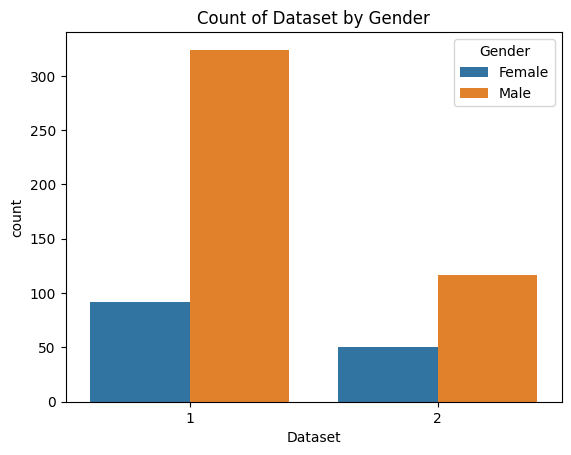

In [45]:
sns.countplot(x='Dataset', hue='Gender', data=data)
plt.title("Count of Dataset by Gender")
plt.show()

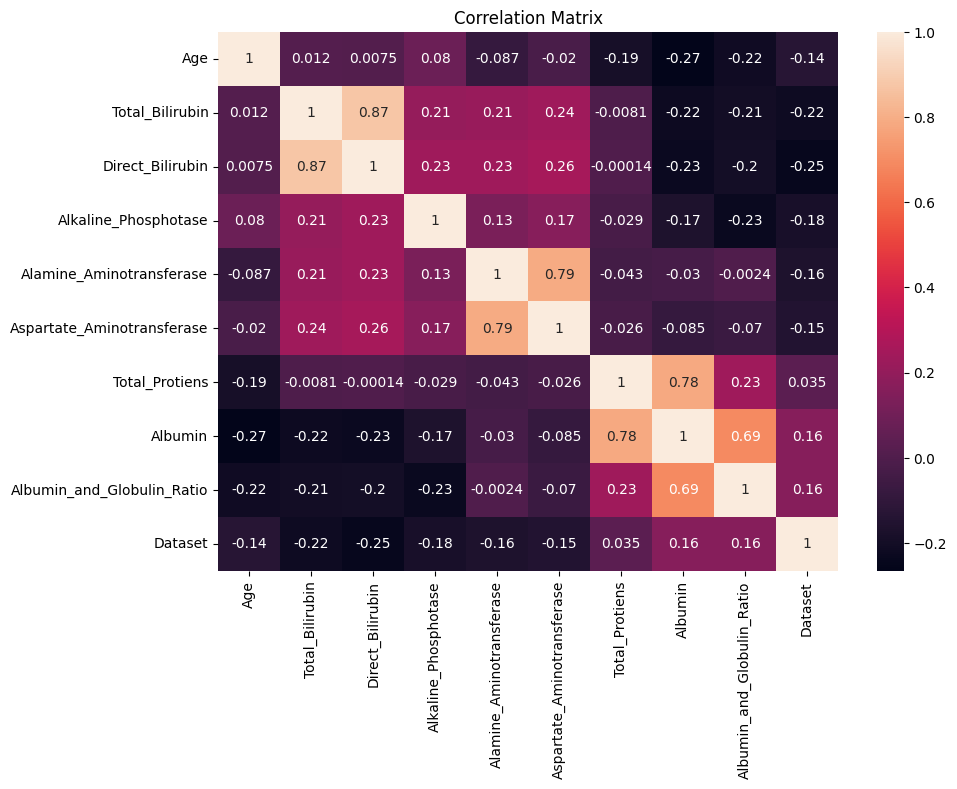

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [47]:
#Numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical columns:")
print(numerical_cols)


Numerical columns:
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [48]:
#Categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
['Gender']


Outlier Detection (using Box Plots)


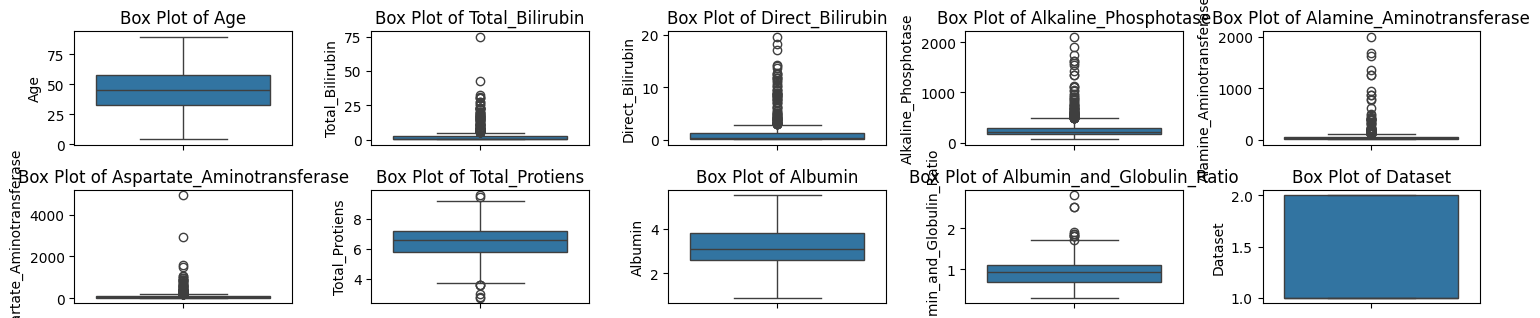

In [49]:
print("Outlier Detection (using Box Plots)")

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


Pairplot (Scatter plots for numerical columns):


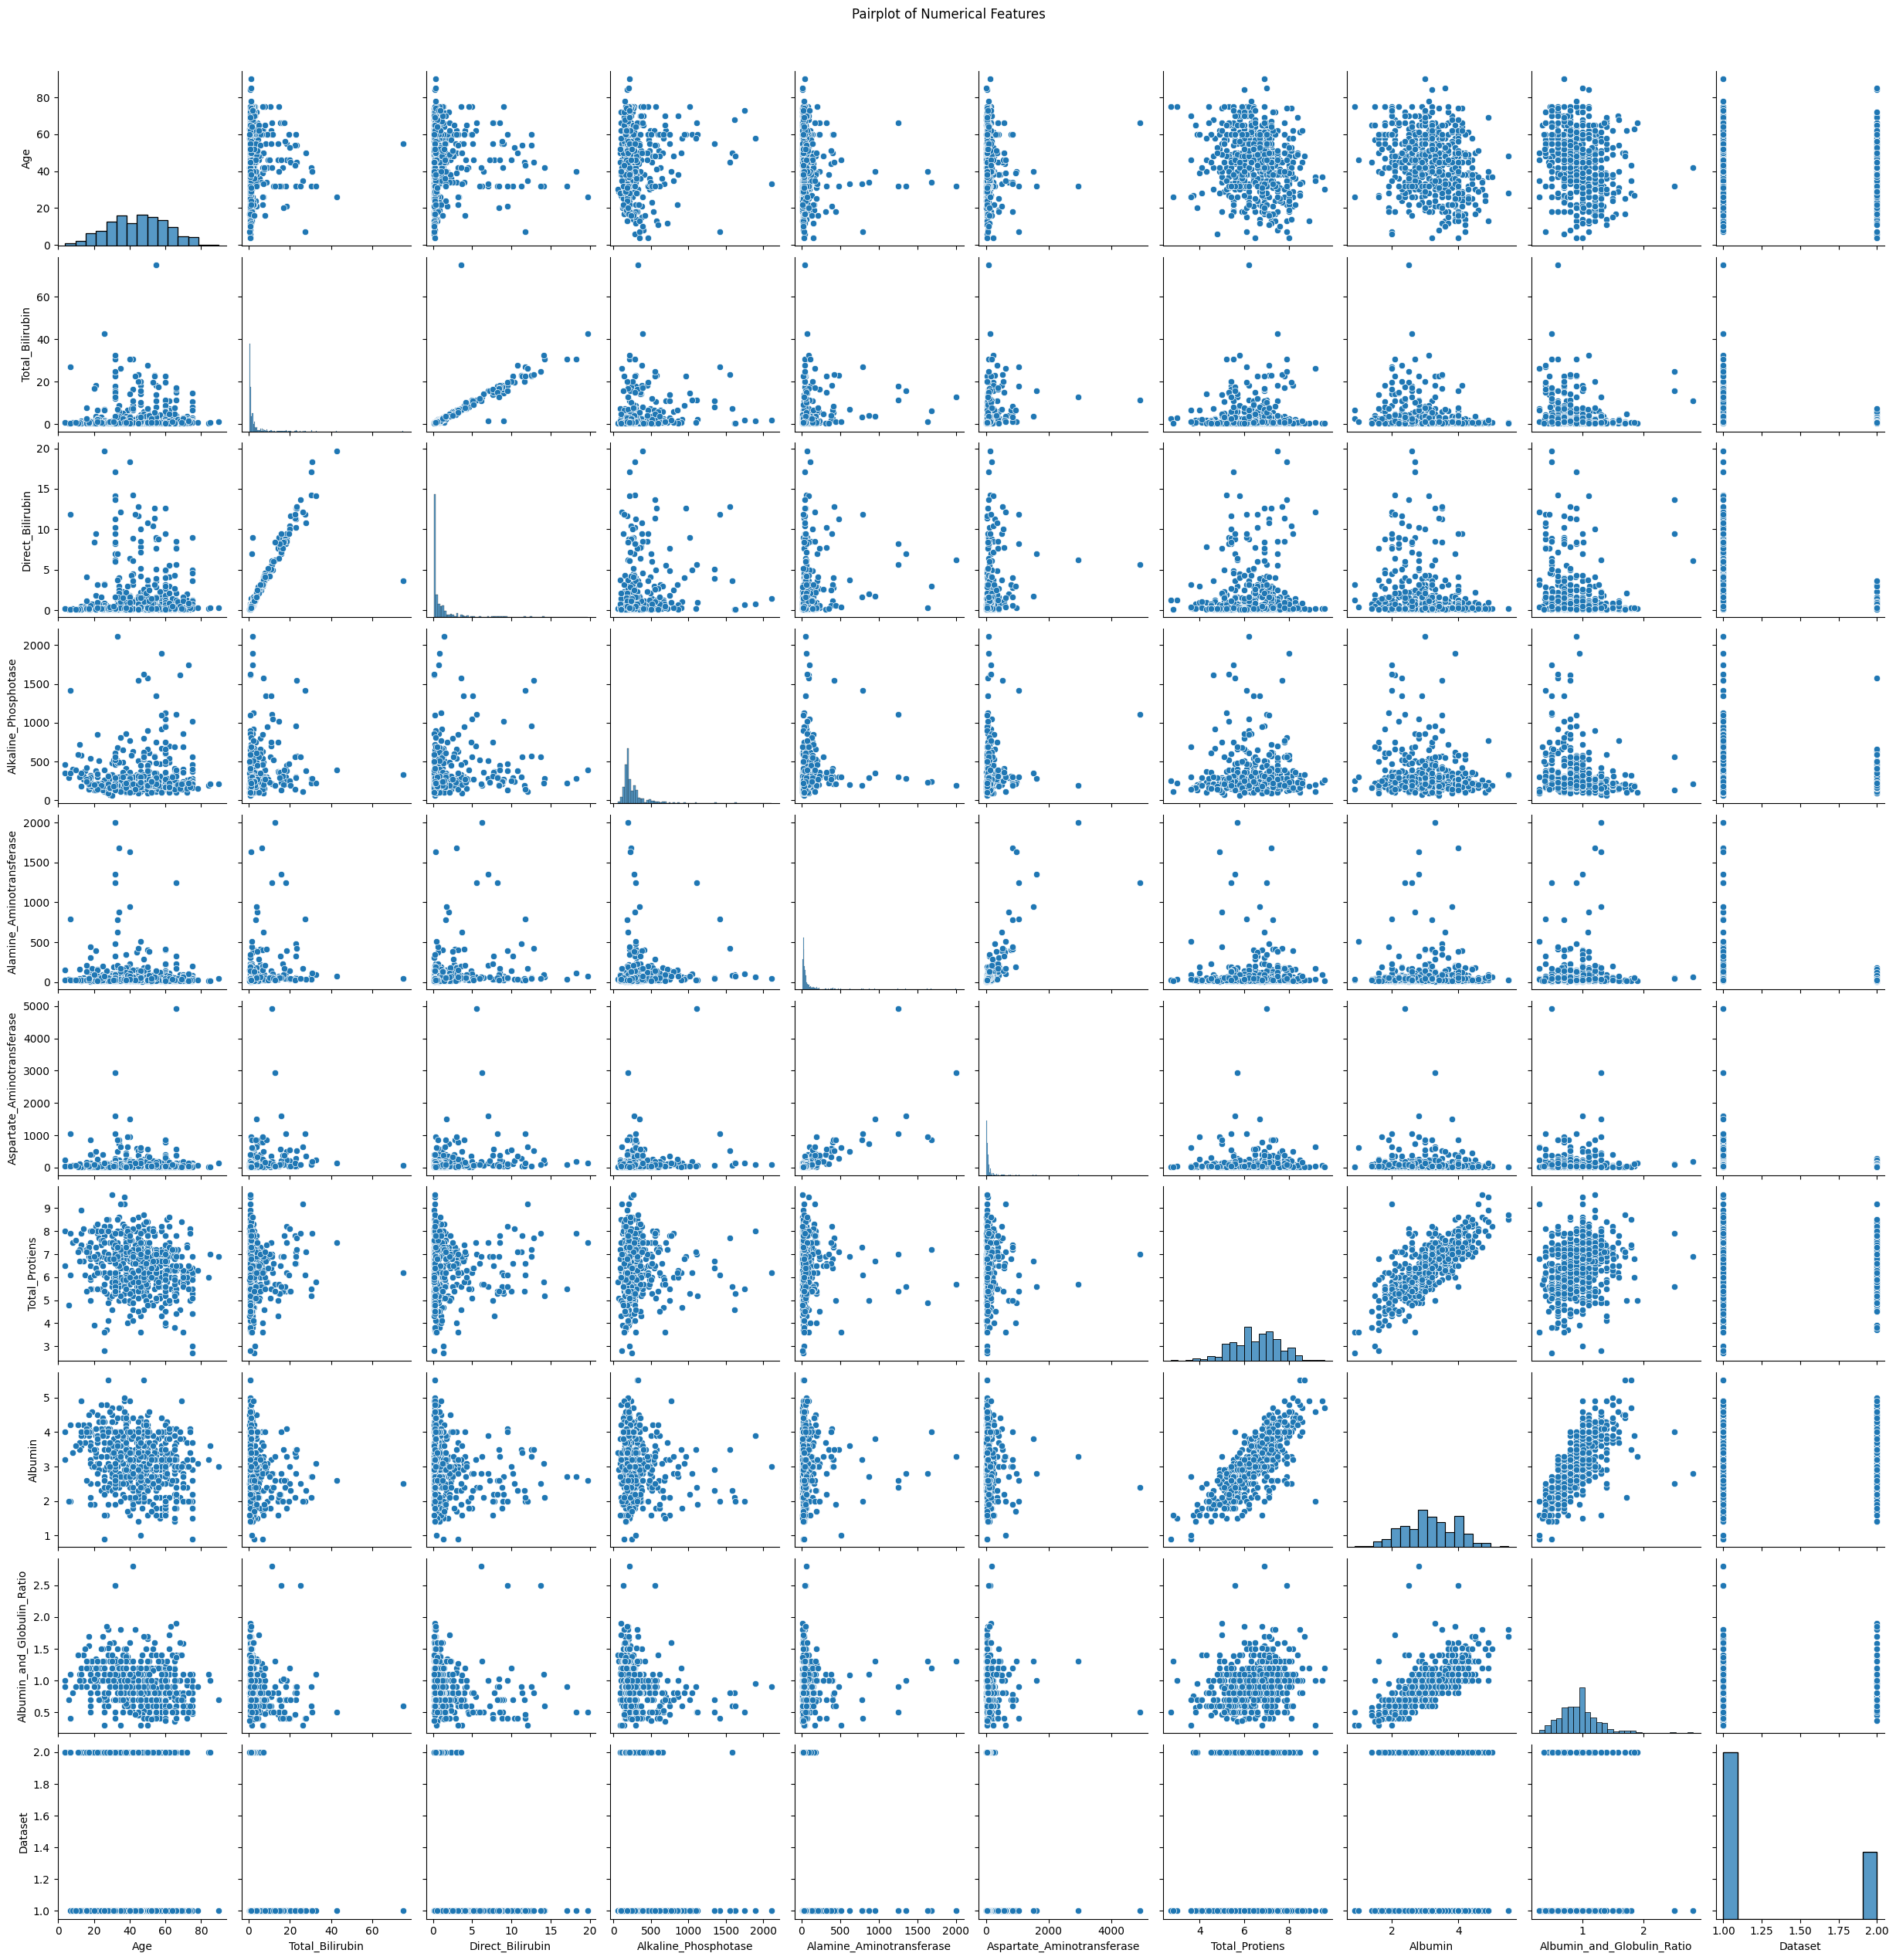

In [50]:
print("\nPairplot (Scatter plots for numerical columns):")
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Add a title to the pairplot
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [52]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [53]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(X),columns=X.columns)

In [54]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237


In [55]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

In [56]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
smote = SMOTE()
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

x_train_smote, y_train_smote = smote.fit_resample(x_train_imputed, y_train)

In [57]:
y_train_smote.value_counts()

Dataset
1    333
2    333
Name: count, dtype: int64